In [1]:
import numpy as np
import pylab
import math
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

In [2]:
# Генерируем выборку из стандартного норального распределения.
sampleSize = 10000
sample = sps.norm.rvs(size=sampleSize)

In [3]:
# Рассчитывает эмпирическое распредление и соответствующую сетку для оси OX.
def computeEmpirical(n, gridCount, gridStart, gridEnd):
    gridStep = (gridEnd - gridStart) / gridCount
    grid = np.linspace(gridStart, gridEnd, gridCount)
    
    count = np.zeros(gridCount)
    for x in sample[:n]:
        if ((x > gridStart) & (x < gridEnd)):
            index = math.floor((x - gridStart) / gridStep)
            count[index] += 1
            
    empirical = []
    Sum = 0
    for x in count:
        Sum += x / n
        empirical.append(Sum)
    return (grid, empirical)
    

In [4]:
# Постоение графика функции эмпирического распределения по подвыборке n.
def empiricalDistPlot(n):
    plt.figure(figsize=(15, 3))
    # Наносим точки подвыборки
    plt.scatter(sample[:n], np.zeros(n) - 0.2, alpha=0.2)
    Tuple = computeEmpirical(n, 10000, -4, 4)
    grid = Tuple[0]
    # Строим график функции эмпирического распределения.
    plt.plot(grid, Tuple[1], color="red")
    # Строим график функции распределения стандартного нормального распределения.
    plt.plot(grid, sps.norm.cdf(grid), "green")
    
    plt.title("Empiric distribution function of subsample n = " + str(n))
    plt.show()

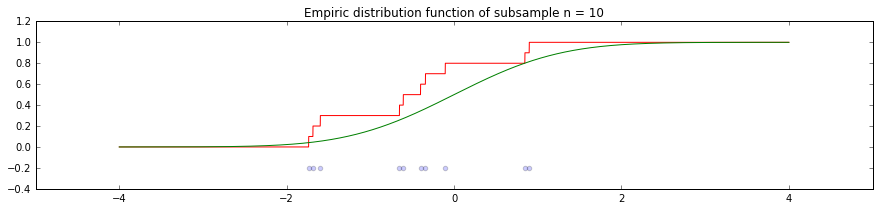

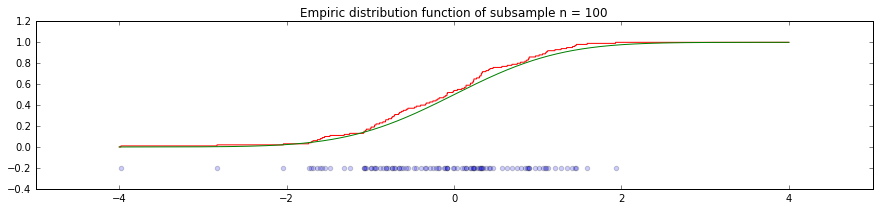

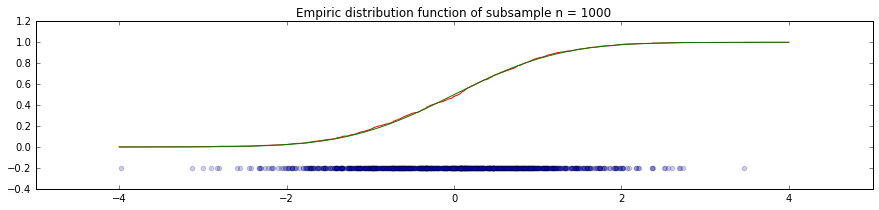

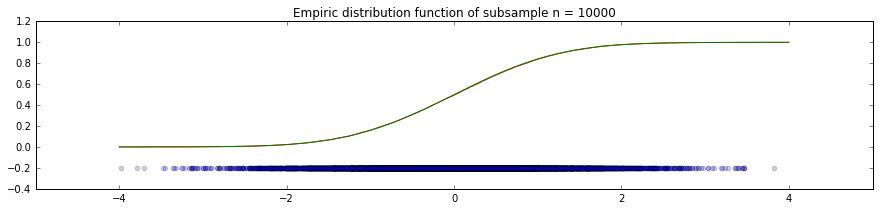

In [5]:
k = 10
while(k <= sampleSize):
    empiricalDistPlot(k)
    k *= 10

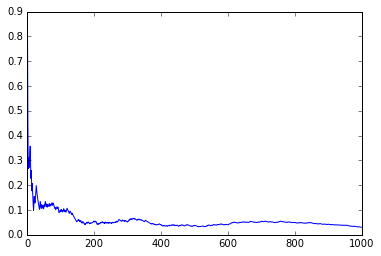

In [6]:
# Считаем супремум отклонения эмпирической функции от нормальной для всех n < N.
d = []
for n in range(1, 1000):
    count = 250 # Число точек в разбиении сетки.
    Tuple = computeEmpirical(n, count, -4, 4)
    grid = Tuple[0]
    imperical = Tuple[1]
    Max = 0
    # Легко доказать, что sup может достигаться только в точках разметки, т.е. в которых 
    # эмпирическая функция распределения имеет скачок.
    for i in range(0, count - 1):
        Max = max(Max, 
                  max(abs(imperical[i] - sps.norm.cdf(grid[i])), 
                      abs(imperical[i + 1] - sps.norm.cdf(grid[i]))
                     )
                 )
    d.append(Max)
    
plt.plot(d)
plt.show()